# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

<ipython-input-4-bfbc7cd960cb>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [5]:
print(df.head())

     id  host_response_time host_response_rate host_acceptance_rate  \
0  2060  a few days or more                22%                  50%   
1  2595        within a day                87%                  38%   
2  3831      within an hour                83%                  96%   
3  5099                 NaN                NaN                  71%   
4  5114        within a day                50%                  NaN   

  host_is_superhost  host_listings_count  host_total_listings_count  \
0                 f                  0.0                        0.0   
1                 f                  6.0                        6.0   
2                 f                  1.0                        1.0   
3                 f                  1.0                        1.0   
4                 f                  3.0                        3.0   

                                  host_verifications host_has_profile_pic  \
0                                        ['reviews']                 

---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [7]:
#Q2
# 각 컬럼의 결측치 수 계산
missing_values = df.isnull().sum()

# 결측치가 0인 컬럼 제외
missing_values = missing_values[missing_values > 0]

# 데이터프레임의 전체 길이 (로우 수) 계산
total_rows = len(df)

# 결측치 비율 계산
missing_percentage = (missing_values / total_rows) * 100

# 결측치 수와 결측치 비율을 포함하는 데이터 프레임 생성
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# 결측치가 많은 순으로 정렬
missing_df.sort_values(by='Missing Values', ascending=False, inplace=True)

missing_df

,Missing Values,Percentage
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

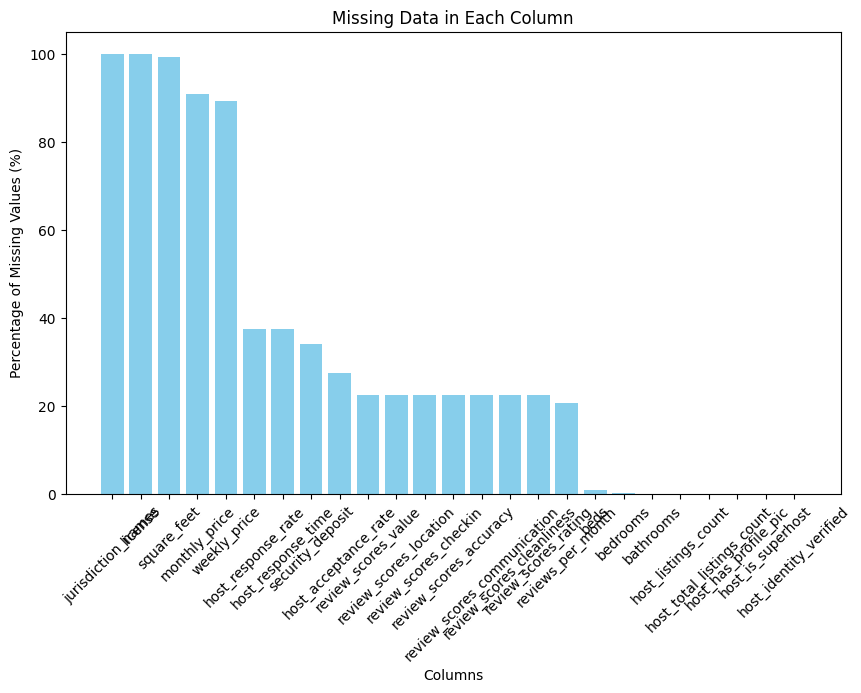

In [10]:
# Q3
# 그래프를 그리기 위한 데이터 준비
columns_with_missing_values = missing_df.index
missing_percentage_values = missing_df['Percentage']

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(columns_with_missing_values, missing_percentage_values, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%)')
plt.title('Missing Data in Each Column')
plt.xticks(rotation=45)
plt.show()


- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [15]:
# Q4
missing_beds_top_5 = df[df['beds'].isnull()].head()

print(missing_beds_top_5)

          id host_response_time host_response_rate host_acceptance_rate  \
808   321845                NaN                NaN                  NaN   
1002  468613                NaN                NaN                  NaN   
1058  499249                NaN                NaN                   0%   
1074  505231                NaN                NaN                  NaN   
1208  587519                NaN                NaN                   0%   

     host_is_superhost  host_listings_count  host_total_listings_count  \
808                  f                  0.0                        0.0   
1002                 f                  1.0                        1.0   
1058                 f                  1.0                        1.0   
1074                 f                  1.0                        1.0   
1208                 f                  1.0                        1.0   

                                     host_verifications host_has_profile_pic  \
808                     

---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [16]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [17]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

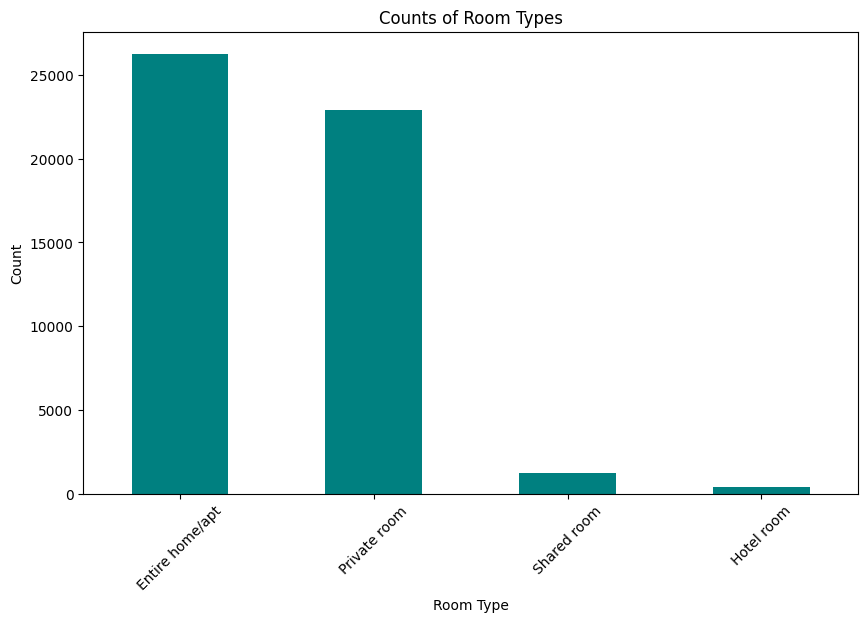

In [20]:
# Q5
room_type_counts = df['room_type'].value_counts()
plt.figure(figsize=(10, 6))
room_type_counts.plot(kind='bar', color='teal')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Counts of Room Types')
plt.xticks(rotation=45)
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

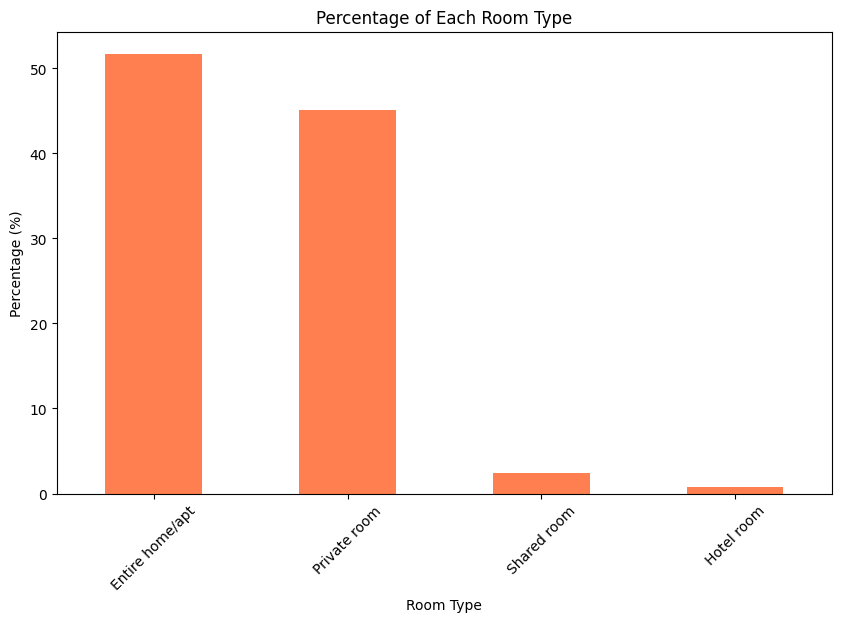

In [21]:
# Q6
# room_type 컬럼의 종류별 비율 계산
room_type_counts = df['room_type'].value_counts(normalize=True) * 100

# 그래프 생성
plt.figure(figsize=(10, 6))
room_type_counts.plot(kind='bar', color='coral')
plt.xlabel('Room Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Each Room Type')
plt.xticks(rotation=45)
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

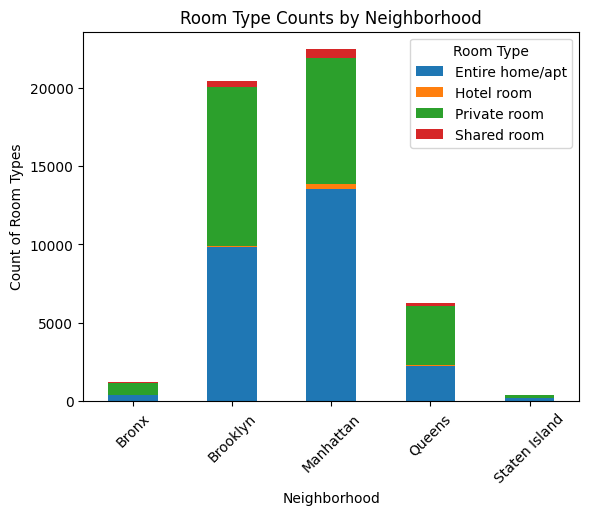

In [24]:
# groupby 결과를 unstack하여 각 room_type별로 컬럼을 분리
room_type_by_neighborhood_unstacked = room_type_by_neighborhood.unstack().fillna(0)

# 그래프 생성
room_type_by_neighborhood_unstacked.plot(kind='bar', stacked=True)
plt.xlabel('Neighborhood')
plt.ylabel('Count of Room Types')
plt.title('Room Type Counts by Neighborhood')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

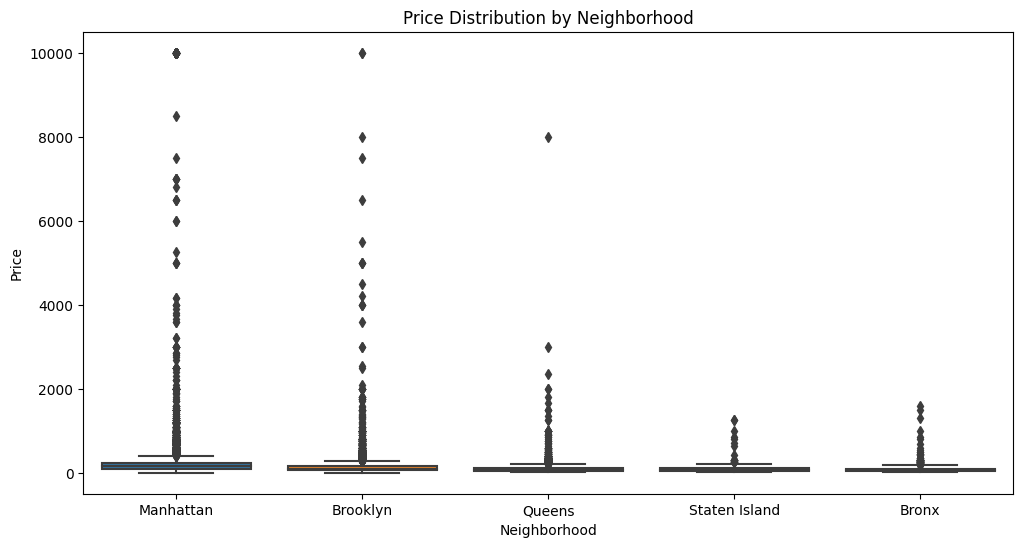

In [25]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(12, 6))

# 각 지역별 가격 분포를 boxplot으로 표시
sns.boxplot(x='neighborhood', y='price', data=df)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Price Distribution by Neighborhood')
plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9
맨해튼에 가격이 10000인 이상값들이 있다
이유 중 하나는 아파트가 많아서일 것이다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

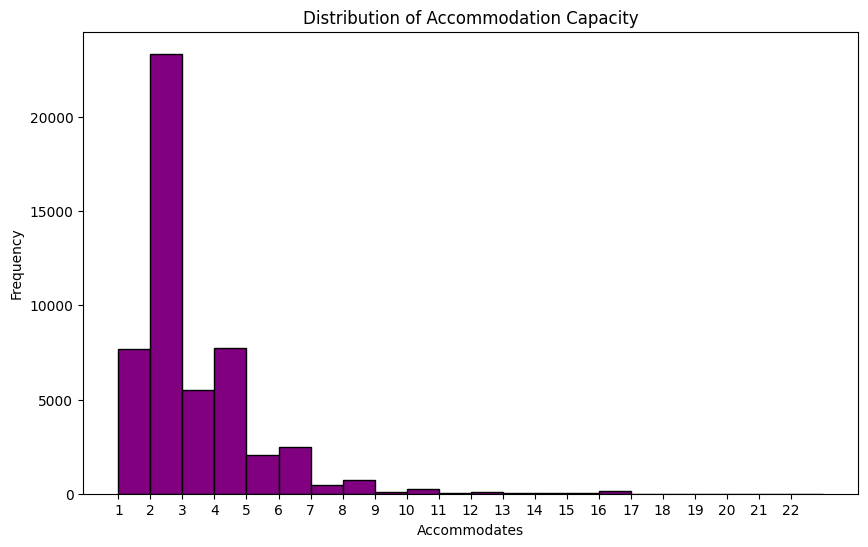

In [26]:
# Q10
# 'accommodates' 칼럼에 대한 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(df['accommodates'], bins=range(1, df['accommodates'].max() + 2), color='purple', edgecolor='black')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.title('Distribution of Accommodation Capacity')
plt.xticks(range(1, df['accommodates'].max() + 1))
plt.show()


- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

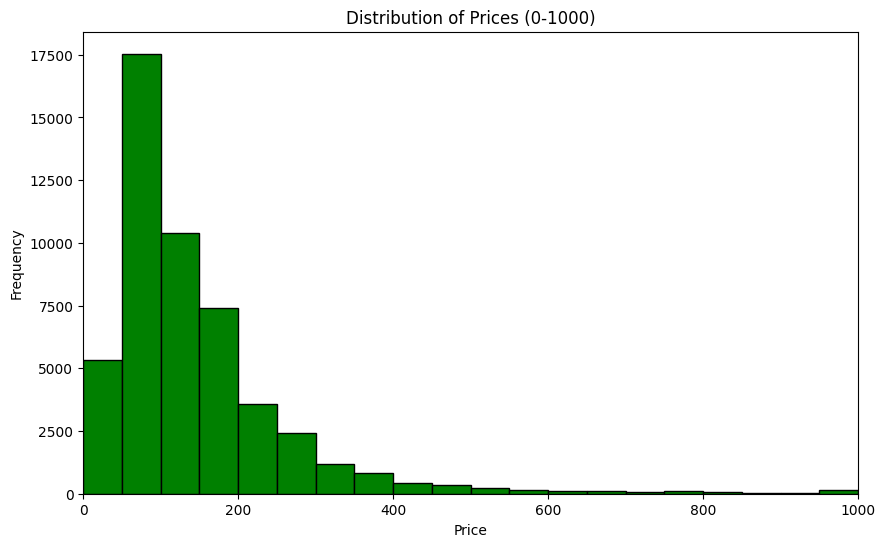

In [27]:
# Q11
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=range(0, 1001, 50), color='green', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices (0-1000)')
plt.xlim(0, 1000)
plt.show()



* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [28]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

<ipython-input-28-bfbc7cd960cb>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [29]:
#Q12
# 범주형 데이터 컬럼과 숫자형 데이터 컬럼을 구분
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# 결측치 비율 계산 및 처리
for column in df.columns:
    missing_percentage = df[column].isnull().sum() / total_rows

    # 결측치가 25% 이상인 경우 컬럼 삭제
    if missing_percentage >= 0.25:
        df.drop(column, axis=1, inplace=True)

# 숫자형 컬럼에 대해서만 결측치 처리를 계속 진행
for column in numeric_columns:
    if column in df.columns:
        missing_percentage = df[column].isnull().sum() / len(df)

        # 결측치가 10% 이상 25% 미만인 경우 결측치가 있는 행 삭제
        if 0.10 <= missing_percentage < 0.25:
            df.dropna(subset=[column], inplace=True)
        # 결측치가 10% 미만인 경우 중앙값으로 대체
        elif missing_percentage < 0.10:
            df[column].fillna(df[column].median(), inplace=True)

# 처리된 데이터 프레임 확인
df


,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,...,10.0,10.0,10.0,f,f,f,flexible,f,f,0.01
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,...,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,...,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,...,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,...,10.0,10.0,10.0,f,t,f,moderate,f,f,1.00
50526,42762152,f,1.0,1.0,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,...,10.0,10.0,10.0,f,t,f,flexible,f,f,1.00
50598,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00
50650,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [32]:
#Q13-1)
df_one_hot = pd.get_dummies(df, columns=['room_type', 'neighborhood'])
#원-핫 인코딩은 각 범주형 변수의 각 범주를 새로운 이진 특성으로 변환하여, 모델이 이 데이터를 더 잘 이해하고 사용할 수 있게 합니다.

In [33]:
#Q13-2)
price_bins = [0, 100, 200, np.inf]
price_labels = ['Low', 'Medium', 'High']
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)
#이렇게 하면 가격 범위에 따른 숙소의 특성이나 인기도 등을 더 잘 이해할 수 있습니다.


In [34]:
#Q13-3)
df['price_per_person'] = df['price'] / df['accommodates']
#이 특성은 숙소의 가성비를 평가하는 데 도움이 될 수 있으며, 예산에 민감한 소비자들에게 유용한 정보를 제공할 수 있습니다.

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
